# **Bidirectional**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [ ]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

Saving KelantanNew.csv to KelantanNew.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['KelantanNew.csv']))
print(df,sep=',')
df.head()

             Date  Month  Day  ...  Jbtn Pert Bachok  Stsn K.api Tumpat  Kg.Beris
0        1/1/1975      1    1  ...               3.5               16.0      12.0
1        2/1/1975      1    2  ...              43.0               72.0      30.5
2        3/1/1975      1    3  ...              91.0               78.0     285.0
3        4/1/1975      1    4  ...              54.5               49.0     160.5
4        5/1/1975      1    5  ...               4.0                0.0       3.0
...           ...    ...  ...  ...               ...                ...       ...
14595  27/12/2014     12   27  ...               4.5                2.5       1.5
14596  28/12/2014     12   28  ...               0.5                3.5      18.0
14597  29/12/2014     12   29  ...              18.5                4.0      35.5
14598  30/12/2014     12   30  ...               0.5                0.0       2.0
14599  31/12/2014     12   31  ...               1.0                5.0       0.0

[14600 rows x 1

,Date,Month,Day,Gua Musang,Gunung Gagau,Kg Aring,Kg Laloh,Dabong,Ldg Lapan Kabu,JPS Machang,K.api Bkt Panau,Ibu Bekalan Tok Uban,JPS Kuala Krai,Kg Jeli,Kota Bahru,Jbtn Pert Bachok,Stsn K.api Tumpat,Kg.Beris
0,1/1/1975,1,1,6.6,8.352438,0.0,31.0,19.2,37.0,56.8,10.0,26.5,15.0,21.0,11.4,3.5,16.0,12.0
1,2/1/1975,1,2,29.4,7.618182,0.0,21.0,32.8,7.5,37.7,60.0,7.5,14.0,45.0,0.5,43.0,72.0,30.5
2,3/1/1975,1,3,0.0,3.024566,0.0,6.9,10.0,132.0,57.8,250.0,59.5,14.5,4.0,42.0,91.0,78.0,285.0
3,4/1/1975,1,4,24.0,1.324945,0.0,98.1,78.0,11.5,431.8,93.0,63.0,54.5,0.0,53.7,54.5,49.0,160.5
4,5/1/1975,1,5,5.0,1.308976,0.0,5.0,2.0,0.0,101.9,0.0,36.5,8.5,38.0,36.0,4.0,0.0,3.0


**With** **Normalization**

In [ ]:
dataset = df.loc[:,'JPS Kuala Krai'].values
dataset = np.reshape(dataset,(-1,1))
print(dataset)
dataset.shape

[[15.        ]
 [14.        ]
 [14.5       ]
 ...
 [19.4850355 ]
 [ 6.87998235]
 [ 0.9230126 ]]


(14600, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
#train_size = int(len(dataset) * 0.80)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

[[0.03861004]
 [0.03603604]
 [0.03732304]
 ...
 [0.05015453]
 [0.01770909]
 [0.00237584]]


In [ ]:
#split into samples
from numpy import array

#14600/365 = 40
#sample = list(rain)

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  x, y = list(), list()
  for i in range(len(sequence)):
    #find end of this pattern
    end_ix = i + n_steps
    #check if beyond the sequence
    if end_ix > len(sequence)-1:
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x), array(y)

series = array(dataset)
print(series.shape)

x, y = split_sequence(series, 365)
print(x.shape, y.shape)

(14600, 1)
(14235, 365, 1) (14235, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9964, 365, 1) (9964, 1)
(4271, 365, 1) (4271, 1)


In [ ]:
#reshape 
series1 = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
series2 = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(series1.shape)
print(series2.shape)

(9964, 365, 1)
(4271, 365, 1)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.optimizers import SGD
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


**batch size for series1 = 2, 4, 53, 94, 106, 188, 2491, 4982**

**batch size for series2 = 4271 is a prime number**

In [ ]:
K.clear_session()
model = Sequential()
model.add(Bidirectional(LSTM(13), input_shape=(365, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))

#opt = keras.optimizers.Adam(learning_rate=1e-1000)
#opt = optimizers.adam(clipnorm=1.0)
#opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(series1, y_train, epochs=100, batch_size= 200, validation_data=(series2, y_test), 
          callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 9964 samples, validate on 4271 samples
Epoch 1/60
9964/9964 [==============================] - 23s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 2/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 3/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 9/60
9964/9964 [==============================] - 16s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 10/60
9964/9964 [==

**Make Predictions**

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_predict = model.predict(series1)
test_predict = model.predict(series2)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [ ]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:,0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:,0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:,0], test_predict[:,0])))

Train Mean Absolute Error: 8.338026016381303
Train Root Mean Squared Error: 16.480898063264956
Test Mean Absolute Error: 8.424152567799608
Test Root Mean Squared Error: 16.47507373466981


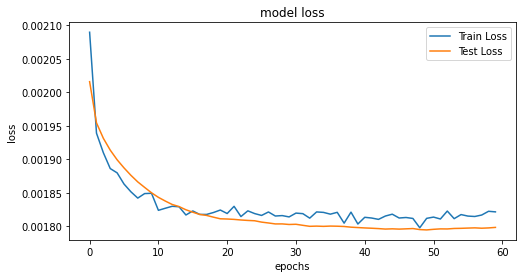

In [ ]:
import matplotlib.pyplot as plt
#plot model loss

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

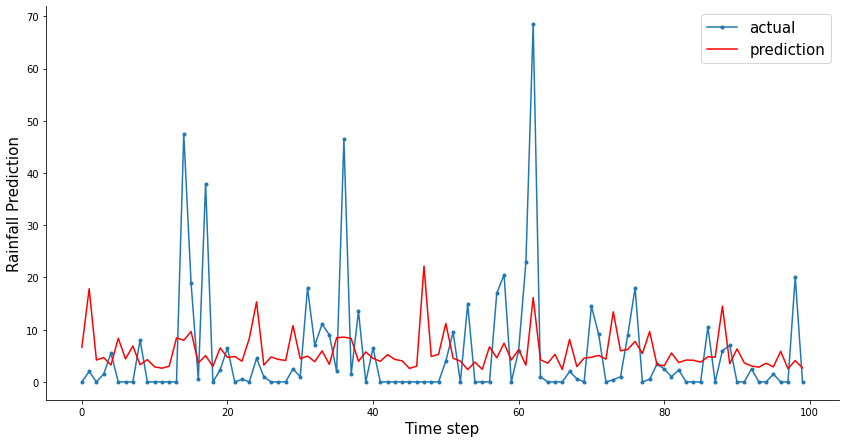

In [ ]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(100)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:100], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:100], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Rainfall Prediction', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

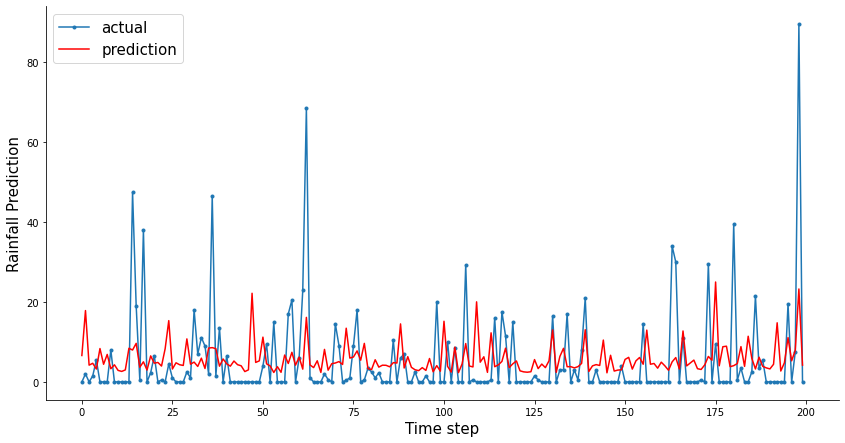

In [ ]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Rainfall Prediction', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

(4271, 1)
(4271, 1)


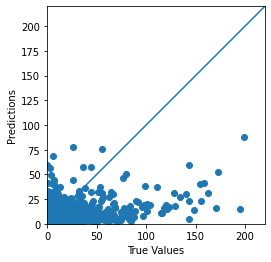

In [ ]:
print(test_predict.shape)
print(y_test.shape)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
import scipy.stats as measures

per_coef = measures.pearsonr(y_test[:,0], test_predict[:,0])
#mse_coef = np.mean(np.square(np.array(y_pred) - np.array(y_true)))
print(per_coef)

(0.4025899941416024, 3.619560970456286e-166)


In [ ]:
per_coef1 = measures.pearsonr(y_train[:,0], train_predict[:,0])
print(per_coef1)

(0.363457630931535, 7.1766401081352e-309)


# CNN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [ ]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Saving Kuantan1975-2017New.csv to Kuantan1975-2017New.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Kuantan1975-2017New.csv']))
print(df,sep=',')
df.head()

                  Date  Year  Month  Day  KUANTAN[mm]
0        1/1/1975 0:00  1975      1    1          0.5
1        1/2/1975 0:00  1975      1    2        131.3
2        1/3/1975 0:00  1975      1    3         10.8
3        1/4/1975 0:00  1975      1    4        240.5
4        1/5/1975 0:00  1975      1    5         18.1
...                ...   ...    ...  ...          ...
15690  12/27/2017 0:00  2017     12   27          2.6
15691  12/28/2017 0:00  2017     12   28         20.6
15692  12/29/2017 0:00  2017     12   29         49.4
15693  12/30/2017 0:00  2017     12   30         14.4
15694  12/31/2017 0:00  2017     12   31         61.4

[15695 rows x 5 columns]


,Date,Year,Month,Day,KUANTAN[mm]
0,1/1/1975 0:00,1975,1,1,0.5
1,1/2/1975 0:00,1975,1,2,131.3
2,1/3/1975 0:00,1975,1,3,10.8
3,1/4/1975 0:00,1975,1,4,240.5
4,1/5/1975 0:00,1975,1,5,18.1


In [ ]:
dataset = df.loc[:,'KUANTAN[mm]'].values
dataset = np.reshape(dataset,(-1,1))
print(dataset)
dataset.shape

[[  0.5]
 [131.3]
 [ 10.8]
 ...
 [ 49.4]
 [ 14.4]
 [ 61.4]]


(15695, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
#train_size = int(len(dataset) * 0.80)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

[[0.00094787]
 [0.24890995]
 [0.02047393]
 ...
 [0.09364929]
 [0.02729858]
 [0.1163981 ]]


In [ ]:
#split into samples
from numpy import array

#14600/365 = 40
#sample = list(rain)

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  x, y = list(), list()
  for i in range(len(sequence)):
    #find end of this pattern
    end_ix = i + n_steps
    #check if beyond the sequence
    if end_ix > len(sequence)-1:
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x), array(y)

series = array(dataset)
print(series.shape)

x, y = split_sequence(series, 365)
print(x.shape, y.shape)

(15695, 1)
(15330, 365, 1) (15330, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10731, 365, 1) (10731, 1)
(4599, 365, 1) (4599, 1)


In [ ]:
#reshape 
series1 = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
series2 = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(series1.shape)
print(series2.shape)

(10731, 365, 1)
(4599, 365, 1)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [ ]:
K.clear_session()
model = Sequential()


model.add(Conv1D(filters=4, kernel_size=2, input_shape=(365,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


#opt = keras.optimizers.Adam(learning_rate=1e-1000)
#opt = optimizers.adam(clipnorm=1.0)
#opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
#model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(series1, y_train, epochs=500, batch_size= 200, validation_data=(series2, y_test), 
          callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 10731 samples, validate on 4599 samples
Epoch 1/100
10731/10731 [==============================] - 1s 108us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 2/100
10731/10731 [==============================] - 1s 100us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 3/100
10731/10731 [==============================] - 1s 98us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/100
10731/10731 [==============================] - 1s 99us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 5/100
10731/10731 [==============================] - 1s 97us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 6/100
10731/10731 [==============================] - 1s 101us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/100
10731/10731 [==============================] - 1s 100us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 8/100
10731/10731 [==============================] - 1s 95us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/100
10731/10731 [==============================] - 1s 96us/step - loss: 0.0014 - val_loss: 

**Make Predictions**

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_predict = model.predict(series1)
test_predict = model.predict(series2)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [ ]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:,0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:,0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:,0], test_predict[:,0])))

Train Mean Absolute Error: 9.97178932648483
Train Root Mean Squared Error: 19.199328522352307
Test Mean Absolute Error: 10.626513685199473
Test Root Mean Squared Error: 21.349280633138118


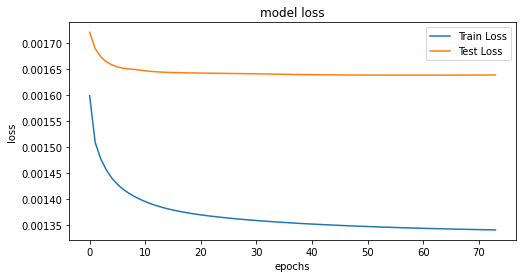

In [ ]:
import matplotlib.pyplot as plt
#plot model loss

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

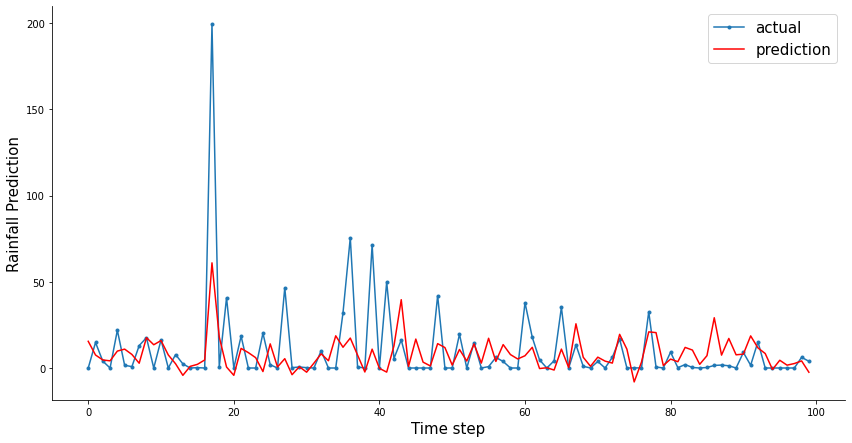

In [ ]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(100)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:100], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:100], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Rainfall Prediction', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

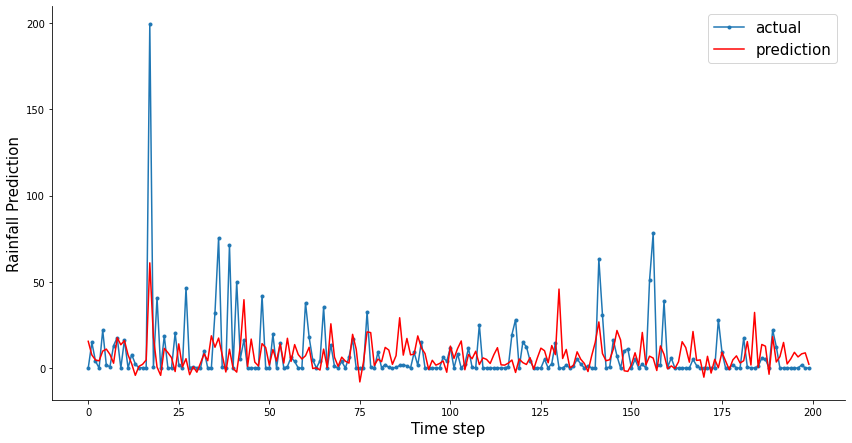

In [ ]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Rainfall Prediction', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

(4599, 1)
(4599, 1)


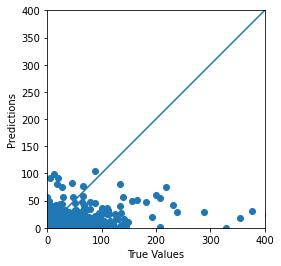

In [ ]:
print(test_predict.shape)
print(y_test.shape)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
import scipy.stats as measures

per_coef = measures.pearsonr(y_test[:,0], test_predict[:,0])
#mse_coef = np.mean(np.square(np.array(y_pred) - np.array(y_true)))
print(per_coef)

(0.2821996342905986, 6.019275724492453e-85)


In [ ]:
per_coef1 = measures.pearsonr(y_train[:,0], train_predict[:,0])
print(per_coef1)

(0.39812121589892546, 0.0)


# CNN-LSTM

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [2]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Saving Kuantan1975-2017New.csv to Kuantan1975-2017New.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Kuantan1975-2017New.csv']))
print(df,sep=',')
df.head()

                  Date  Year  Month  Day  KUANTAN[mm]
0        1/1/1975 0:00  1975      1    1          0.5
1        1/2/1975 0:00  1975      1    2        131.3
2        1/3/1975 0:00  1975      1    3         10.8
3        1/4/1975 0:00  1975      1    4        240.5
4        1/5/1975 0:00  1975      1    5         18.1
...                ...   ...    ...  ...          ...
15690  12/27/2017 0:00  2017     12   27          2.6
15691  12/28/2017 0:00  2017     12   28         20.6
15692  12/29/2017 0:00  2017     12   29         49.4
15693  12/30/2017 0:00  2017     12   30         14.4
15694  12/31/2017 0:00  2017     12   31         61.4

[15695 rows x 5 columns]


,Date,Year,Month,Day,KUANTAN[mm]
0,1/1/1975 0:00,1975,1,1,0.5
1,1/2/1975 0:00,1975,1,2,131.3
2,1/3/1975 0:00,1975,1,3,10.8
3,1/4/1975 0:00,1975,1,4,240.5
4,1/5/1975 0:00,1975,1,5,18.1


In [4]:
dataset = df.loc[:,'KUANTAN[mm]'].values
dataset = np.reshape(dataset,(-1,1))
print(dataset)
dataset.shape

[[  0.5]
 [131.3]
 [ 10.8]
 ...
 [ 49.4]
 [ 14.4]
 [ 61.4]]


(15695, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
#train_size = int(len(dataset) * 0.80)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

[[0.00094787]
 [0.24890995]
 [0.02047393]
 ...
 [0.09364929]
 [0.02729858]
 [0.1163981 ]]


In [6]:
#split into samples
from numpy import array

#14600/365 = 40
#sample = list(rain)

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  x, y = list(), list()
  for i in range(len(sequence)):
    #find end of this pattern
    end_ix = i + n_steps
    #check if beyond the sequence
    if end_ix > len(sequence)-1:
      break
    #gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return array(x), array(y)

series = array(dataset)
print(series.shape)

x, y = split_sequence(series, 365)
print(x.shape, y.shape)

(15695, 1)
(15330, 365, 1) (15330, 1)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10731, 365, 1) (10731, 1)
(4599, 365, 1) (4599, 1)


In [8]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

series1 = x_train.reshape(x_train.shape[0], 73, 5, 1)
series2 = x_test.reshape(x_test.shape[0], 73, 5, 1)
print(series1.shape)
print(series2.shape)

(10731, 73, 5, 1)
(4599, 73, 5, 1)


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [10]:
K.clear_session()
model = Sequential()

model.add(TimeDistributed(Conv1D(filters=16, kernel_size=2, activation='relu'), input_shape=(None, 5, 1)))
model.add(TimeDistributed(MaxPooling1D()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


#opt = keras.optimizers.Adam(learning_rate=1e-1000)
#opt = optimizers.adam(clipnorm=1.0)
#opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
#model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(series1, y_train, epochs=500, batch_size= 200, validation_data=(series2, y_test), 
          callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 10731 samples, validate on 4599 samples
Epoch 1/500
10731/10731 [==============================] - 4s 380us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 2/500
10731/10731 [==============================] - 3s 316us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/500
10731/10731 [==============================] - 3s 315us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/500
10731/10731 [==============================] - 3s 314us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 5/500
10731/10731 [==============================] - 3s 313us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/500
10731/10731 [==============================] - 3s 314us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 7/500
10731/10731 [==============================] - 3s 314us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/500
10731/10731 [==============================] - 3s 311us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/500
10731/10731 [==============================] - 3s 310us/step - loss: 0.0014 - val_l

**Make Predictions**

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_predict = model.predict(series1)
test_predict = model.predict(series2)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

In [ ]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[:,0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[:,0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[:,0], test_predict[:,0])))

Train Mean Absolute Error: 4175.775157704267
Train Root Mean Squared Error: 11781.790022720146
Test Mean Absolute Error: 4330.434272741437
Test Root Mean Squared Error: 12426.579296800259


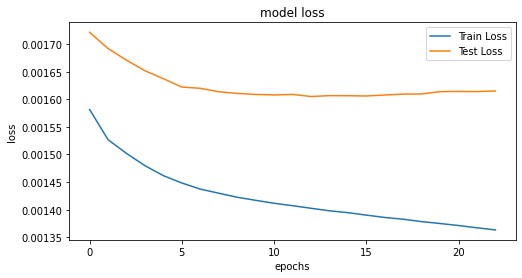

In [ ]:
import matplotlib.pyplot as plt
#plot model loss

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

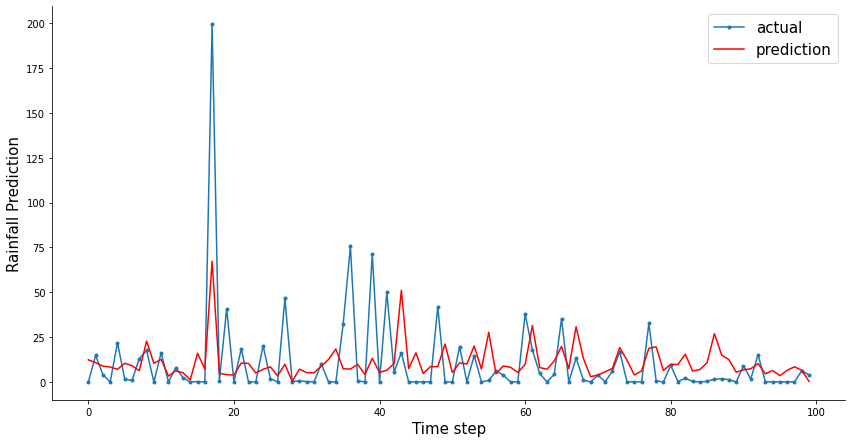

In [ ]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(100)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:100], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:100], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Rainfall Prediction', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

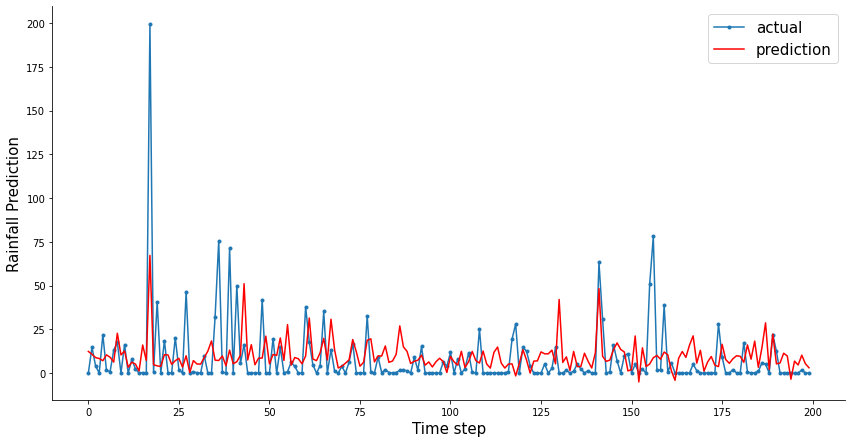

In [ ]:
#actual vs prediction

import seaborn as sns

aa=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(aa, y_test[:,0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Rainfall Prediction', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

(4599, 1)
(4599, 1)


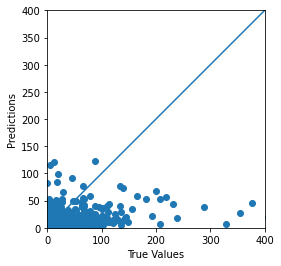

In [ ]:
print(test_predict.shape)
print(y_test.shape)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
import scipy.stats as measures

per_coef = measures.pearsonr(y_test[:,0], test_predict[:,0])
#mse_coef = np.mean(np.square(np.array(y_pred) - np.array(y_true)))
print(per_coef)

(0.2935286259336678, 4.604022093185846e-92)


In [ ]:
per_coef1 = measures.pearsonr(y_train[:,0], train_predict[:,0])
print(per_coef1)

(0.38048355397314404, 0.0)


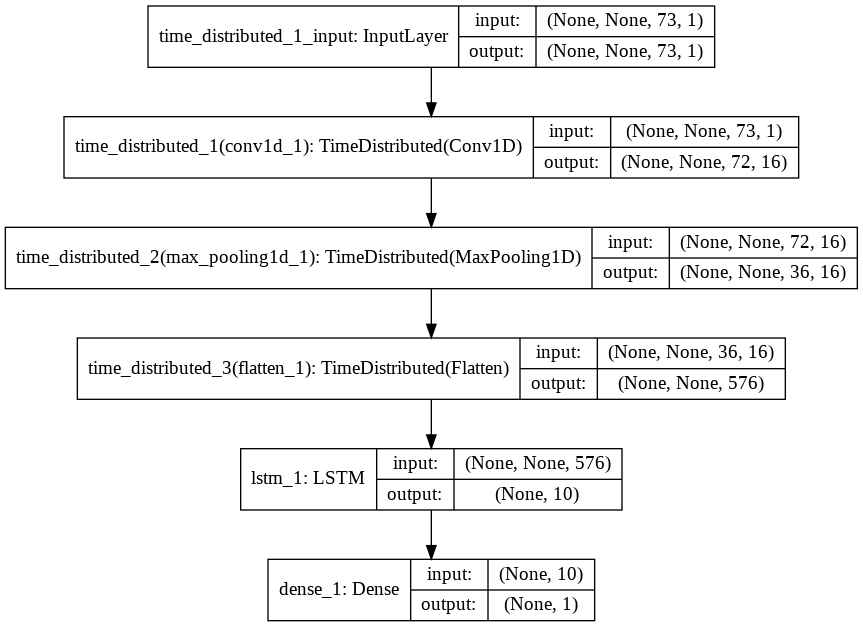

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)